In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#Defining two normal gaussian disteibutions with different means and an identity covariance
meana1 = np.matrix([0, 0]).T
cova1 = np.eye(2)
meana2 = np.matrix([3, 3]).T
cova2 = np.eye(2)

In [3]:
#Defining two normal gaussian disteibutions with different means and the same (non-identity) covariance
meanb1 = np.matrix([0, 0]).T
covb1 = [[3, 1], [1, 0.8]]
meanb2 = np.matrix([3, 3]).T
covb2 = [[3, 1], [1, 0.8]]
Pw1=0.5
Pw2=0.5

In [4]:
def generate_mean(mean1,cov1,mean2, cov2, nsamples,prior1, prior2):
    """
    :param mean1, mean2:   The mean of 2 normal distributions, expressed in NumPy matrix form
    :param cov1, cov2:     The covariance of 2 normal distributions, expressed in NumPy matrix form
    :param nsamples:       The total number (integer) of datapoints to be generated between the two distributions
    :param prior1, prior2  The prior probabilities of each class. Two floats that should add up to 1
    :return:               The accuracy of a two class discrimination function
    """
    count = 0
    p1 = np.matrix(np.random.multivariate_normal(np.squeeze(np.asarray(mean1)), cov1,  int(nsamples*prior1) ))
    p2 = np.matrix(np.random.multivariate_normal(np.squeeze(np.asarray(mean2)), cov2,  int(nsamples*prior2)))
    for y in p1:
        x = np.matrix(y).T
        a = -(0.5 * math.log(np.linalg.det(cov1))) + math.log(prior1)
        y = -0.5 * ((x - mean1).T) * (np.linalg.inv(cov1)) * (x - mean1)
        b = -(0.5 * math.log(np.linalg.det(cov2))) + math.log(prior2)
        z = -0.5 * ((x - mean2).T) * (np.linalg.inv(cov2)) * (x - mean2)
        c = float(a + y)
        d = float(b + z)
        if d < c:
            count += 1
    for y in p2:
        x = np.matrix(y).T
        a = -(0.5 * math.log(np.linalg.det(cov1))) + math.log(prior1)
        y = -0.5 * ((x - mean1).T) * (np.linalg.inv(cov1)) * (x - mean1)
        b = -(0.5 * math.log(np.linalg.det(cov2))) + math.log(prior2)
        z = -0.5 * ((x - mean2).T) * (np.linalg.inv(cov2)) * (x - mean2)
        c = float(a + y)
        d = float(b + z)
        if d > c:
            count += 1
    accuracy = (count / nsamples)
    return (accuracy)



In [5]:
def generate_samples(mean1,cov1,mean2, cov2, nsamples,prior1, prior2):
    """
    :param mean1, mean2:   The mean of 2 normal distributions, expressed in NumPy matrix form
    :param cov1, cov2:     The covariance of 2 normal distributions, expressed in NumPy matrix form
    :param nsamples:       The total number (integer) of datapoints to be generated between the two distributions
    :param prior1, prior2  The prior probabilities of each class. Two floats that should add up to 1
    :return:               A graph of all datapoints from both distributions and the decision boundary bewteen th classes
    """
    x, y = np.random.multivariate_normal(np.squeeze(np.asarray(mean1)), cov1, int(nsamples*prior1)).T
    a, b = np.random.multivariate_normal(np.squeeze(np.asarray(mean2)), cov2, int(nsamples*prior2)).T
    Class1, =plt.plot(x, y, 'x')
    Class2, =plt.plot(a, b, 'o')
    if np.linalg.det(cov1) == 1:
        slope = (-1) * (mean1[0] - mean2[0]) / (mean1[1] - mean2[1])       #Determines the slope of the decision boundary
    else:
        inv = np.linalg.inv(covb1) * (meanb2)
        slope = -1 * (inv[0] / inv[1])
    point = ((0.5) * (mean1 + mean2)) + ((1) / (np.linalg.norm(mean1 - mean2) ** 2)) * (math.log(Pw1 / Pw2)) * (meana1 - meana2)
    intercept = point[1] - (slope * point[0])                         #Determines the y-intercept of the decision boundary
    k=range(-5,9)
    abline_values = [float(slope) * i + float(intercept) for i in k]
    plt.plot(k, abline_values, 'b')                                   #Plots the point of the decision boundary
    plt.axis('equal')
    plt.xlabel("X")
    plt.ylabel('f (x)')
    plt.legend([Class1, Class2], ['Class 1', 'Class 2'])
    plt.title("Accuracy:" + str(generate_mean(mean1,cov1,mean2, cov2, nsamples,prior1, prior2)) )
    plt.show()


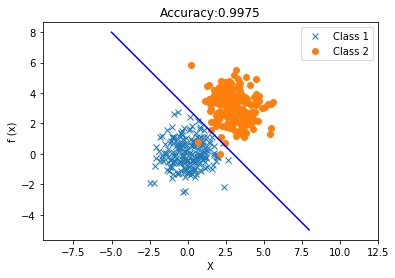

In [6]:
generate_samples(meana1,cova1,meana2,cova2,400,0.5,0.5)

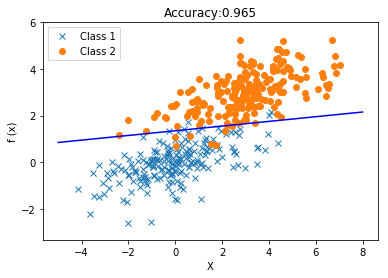

In [7]:
generate_samples(meanb1,covb1,meanb2,covb2,400,0.5, 0.5)

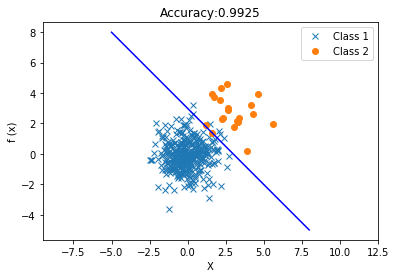

In [8]:
generate_samples(meana1,cova1,meana2,cova2,400,0.95,0.05)


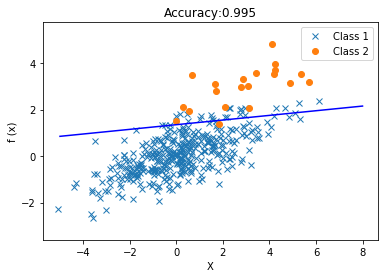

In [9]:
generate_samples(meanb1,covb1,meanb2,covb2,400,0.95, 0.05)